In [4]:
##Problem Statement

#Here we need to categorise the countries on the basis of their socio-economical indicators:

#Developed Country
#Developing Country
#Underdeveloped Country

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

In [6]:
df = pd.read_csv("Country-data.csv")

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df.shape

(167, 10)

In [9]:
df.nunique()

,0
country,167
child_mort,139
exports,147
health,147
imports,151
income,156
inflation,156
life_expec,127
total_fer,138
gdpp,157


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
# target column is not available.. hence it is unsupervised problem.. hence we can use clustering

In [12]:
df.isnull().sum() # if missing values available.. smae or old technique is applied

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [13]:
# pre-processing

In [14]:
df["exports"]=df["exports"]*df["gdpp"]/100
df["imports"]=df["imports"]*df["gdpp"]/100
df["health"]=df["health"]*df["gdpp"]/100

In [15]:
df.head() # run only once

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [16]:
df1 = df.drop("country", axis =1)

In [17]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [18]:
#Scaling(Mandatory)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1_scaled=scaler.fit_transform(df1)

In [20]:
df1_scaled

array([[4.26484907e-01, 2.95093321e-04, 3.36341972e-03, ...,
        4.75345168e-01, 7.36593060e-01, 3.07342821e-03],
       [6.81596884e-02, 6.22655666e-03, 2.94856458e-02, ...,
        8.71794872e-01, 7.88643533e-02, 3.68334145e-02],
       [1.20253165e-01, 9.31468360e-03, 2.00167874e-02, ...,
        8.75739645e-01, 2.74447950e-01, 4.03649935e-02],
       ...,
       [1.00778968e-01, 5.12723048e-03, 8.87582515e-03, ...,
        8.08678501e-01, 1.26182965e-01, 1.02988479e-02],
       [2.61441091e-01, 2.13292722e-03, 6.36206303e-03, ...,
        6.98224852e-01, 5.55205047e-01, 1.02988479e-02],
       [3.91918208e-01, 2.93402035e-03, 8.45852168e-03, ...,
        3.92504931e-01, 6.70347003e-01, 1.17305692e-02]])

In [21]:
#Modeling
#Developed Country
#Developing Country
#Underdeveloped Country
#So..No of clusters k =3

In [22]:
k=3

In [23]:
print(df1_scaled.dtype)

float64


In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans=KMeans(n_clusters=k, random_state=100)

In [26]:
kmeans.fit(df1_scaled)

KMeans(n_clusters=3, random_state=100)

In [28]:
output = kmeans.predict(df1_scaled)
output

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [29]:
df1_scaled.dtype

dtype('float64')

In [32]:
# tagged them against the original data
df['cluster'] = output

In [31]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


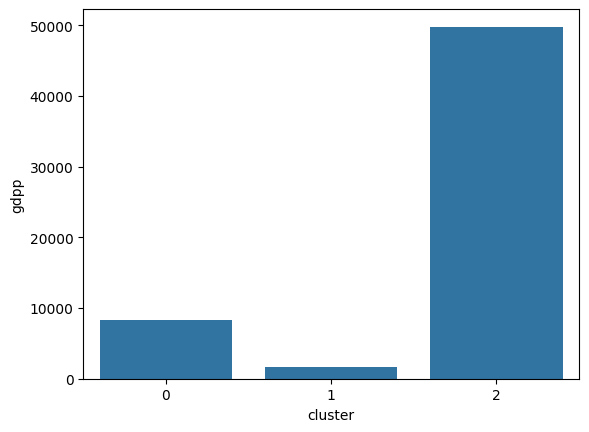

In [33]:
sns.barplot(x=df["cluster"], y=df["gdpp"], ci=None)
plt.show()

In [35]:
df["cluster"]=df["cluster"].map({1:"Under Developed", 2:"Developed",0:"Developing"})

In [36]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Under Developed
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Under Developed
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Developing


from matplotlib import pyplot as plt
_df_0['child_mort'].plot(kind='hist', bins=20, title='child_mort')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['exports'].plot(kind='hist', bins=20, title='exports')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['health'].plot(kind='hist', bins=20, title='health')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['imports'].plot(kind='hist', bins=20, title='imports')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('cluster').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='child_mort', y='exports', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='exports', y='health', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='health', y='imports', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='imports', y='income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['exports']
  ys = series['child_mort']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('exports', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('exports')
_ = plt.ylabel('child_mort')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['exports']
  ys = series['child_mort']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('exports', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cluster')):
  _plot_series(series, series_name, i)
  fig.legend(title='cluster', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('exports')
_ = plt.ylabel('child_mort')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['exports']
  ys = series['health']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('exports', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('exports')
_ = plt.ylabel('health')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['exports']
  ys = series['health']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('exports', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cluster')):
  _plot_series(series, series_name, i)
  fig.legend(title='cluster', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('exports')
_ = plt.ylabel('health')

from matplotlib import pyplot as plt
_df_14['child_mort'].plot(kind='line', figsize=(8, 4), title='child_mort')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['exports'].plot(kind='line', figsize=(8, 4), title='exports')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['health'].plot(kind='line', figsize=(8, 4), title='health')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['imports'].plot(kind='line', figsize=(8, 4), title='imports')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cluster'].value_counts()
    for x_label, grp in _df_18.groupby('country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('country')
_ = plt.ylabel('cluster')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='child_mort', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['cluster'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='child_mort', y='cluster', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='exports', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['cluster'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='exports', y='cluster', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [37]:
#valiadte

---------------------------- child_mort Vs Clusters ---------------------------------


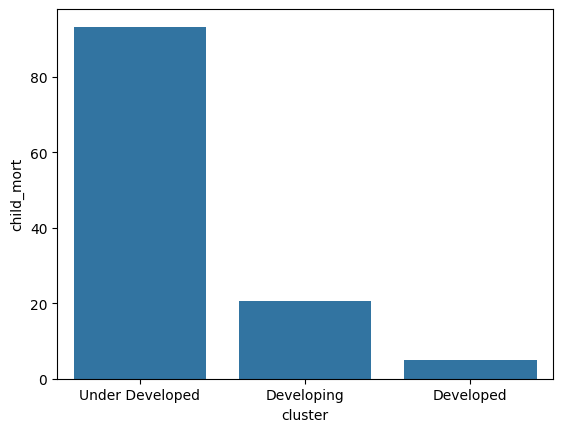

---------------------------- exports Vs Clusters ---------------------------------


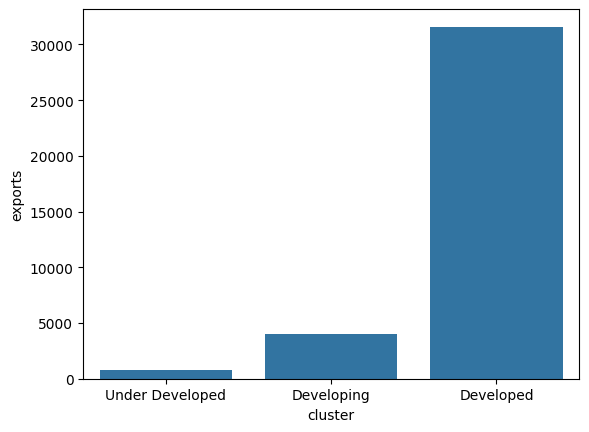

---------------------------- health Vs Clusters ---------------------------------


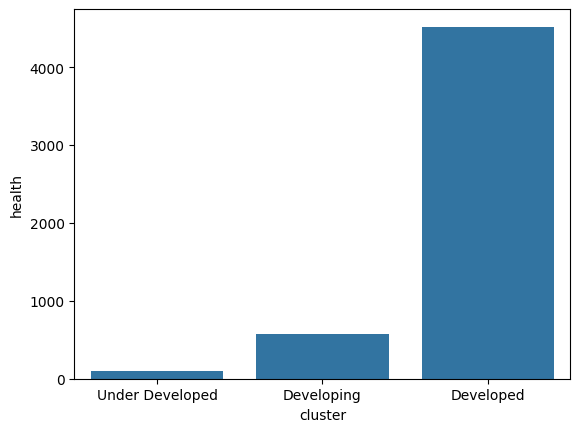

---------------------------- imports Vs Clusters ---------------------------------


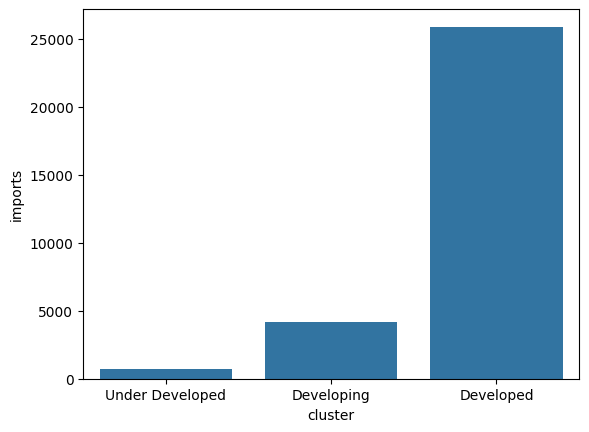

---------------------------- income Vs Clusters ---------------------------------


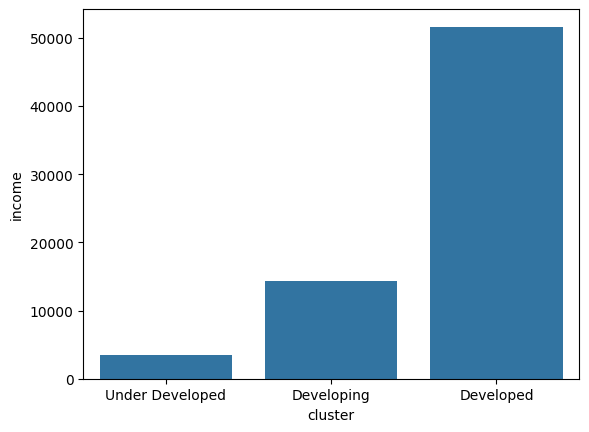

---------------------------- inflation Vs Clusters ---------------------------------


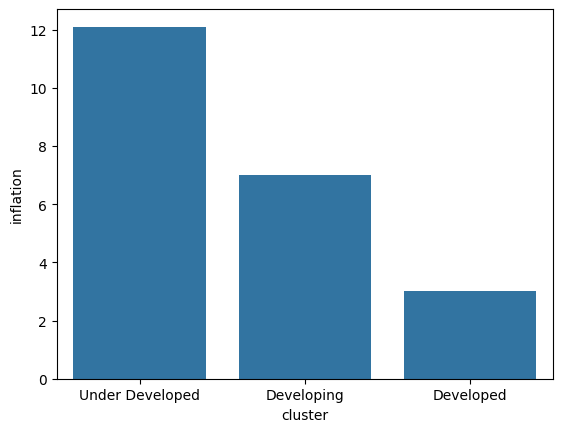

---------------------------- life_expec Vs Clusters ---------------------------------


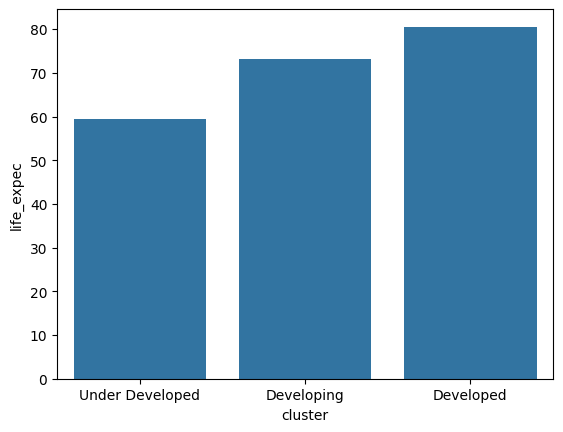

---------------------------- total_fer Vs Clusters ---------------------------------


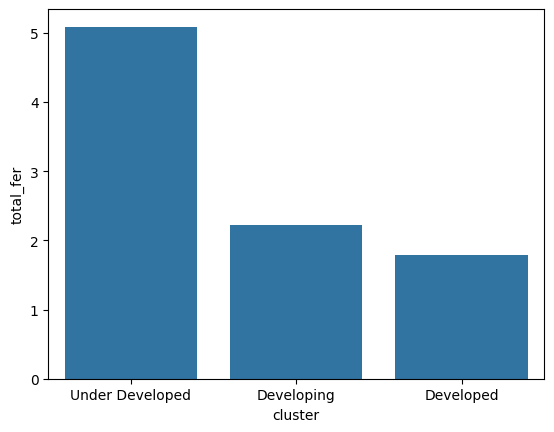

---------------------------- gdpp Vs Clusters ---------------------------------


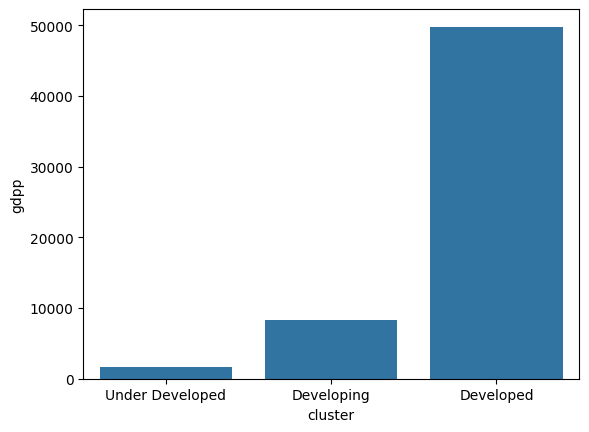

In [38]:
for i in df1.columns:
  print("----------------------------",i,"Vs Clusters","---------------------------------")
  sns.barplot(x=df["cluster"], y=df[i], ci=None)
  plt.show()

In [40]:
list(df[df["cluster"]=="Developed"]["country"])

['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Qatar',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [41]:
list(df[df["cluster"]=="Developing"]["country"])

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Israel',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 

In [42]:
# Hierarchal clustering

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [47]:
temp=pd.DataFrame(df1_scaled).sample(20)

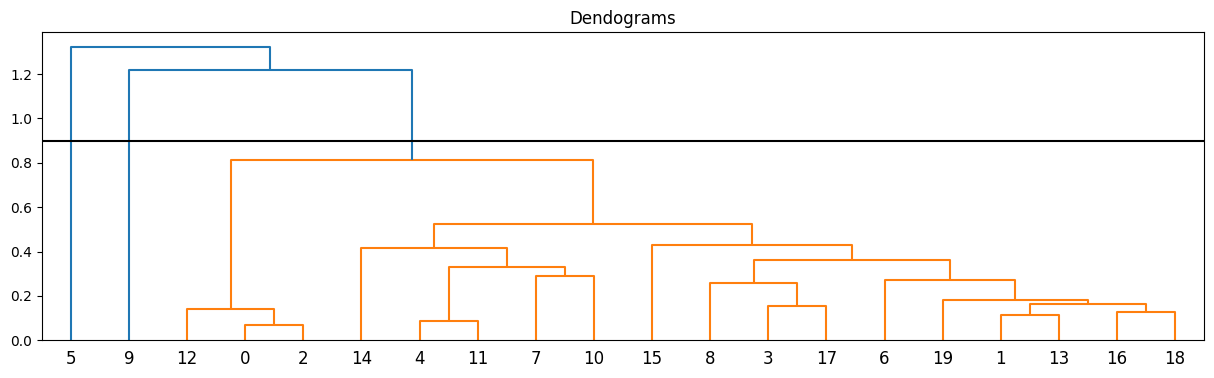

In [53]:
Z= linkage(temp,method="average")
plt.figure(figsize=(15,4))
plt.title("Dendograms")
dendrogram1 = dendrogram(Z)
d=0.9
plt.axhline(y=d, c='k')
plt.show()